
## **Ising Model** 


**The Ising Model as Spin Matrix:**


Ising Model for 500 Repeats and N=100 and T=1,3,5

 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]] 



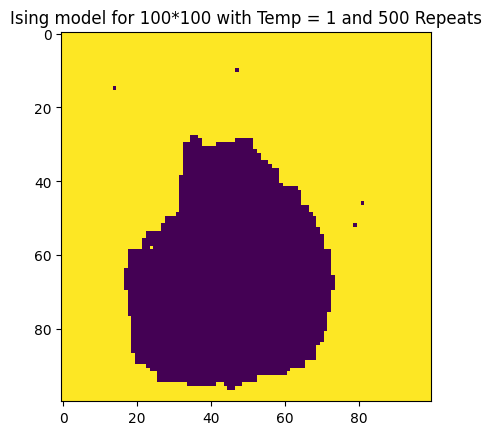


 [[ 1  1 -1 ... -1 -1  1]
 [ 1  1  1 ...  1 -1 -1]
 [ 1  1 -1 ... -1 -1 -1]
 ...
 [ 1 -1  1 ...  1  1 -1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1 -1 ...  1  1  1]] 



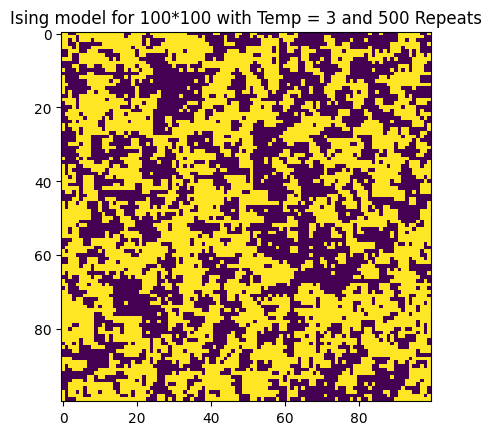


 [[ 1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [-1  1 -1 ...  1  1 -1]
 [ 1 -1  1 ... -1 -1 -1]
 [ 1 -1  1 ... -1 -1  1]] 



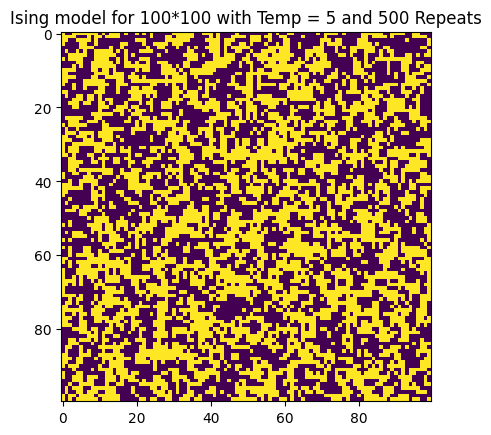

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['savefig.dpi']=100

N=100
T=2.0
J=1.0
Rep=500

def rnd_mx(N):
    mx=np.random.randint(0,N,size=(N,N))
    return mx

M=np.random.choice([-1,1],size=(N,N))
def ising(Rep,N,J,T):
    for k in range(Rep):
        A=rnd_mx(N)
        B=rnd_mx(N)
        #print(M,"\n")
        for i in range(N):
            for j in range(N):
                a=A[i][j]
                b=B[i][j]
                #print(a,b)
                s=M[a][b]
                dE=2*J*s*(M[(a+1)%N][b]+M[(a-1)%N][b]+M[a][(b+1)%N]+M[a][(b-1)%N])
                if dE<0:
                    s*=-1 
                elif np.random.rand()<=np.exp(-dE/T):
                    s*=-1
                M[a][b]=s
                #print(M)
    print("\n",M,"\n")
    plt.imshow(M,cmap='viridis')
    plt.title(f'Ising model for {N}*{N} with Temp = {T} and {Rep} Repeats')
    plt.show()
    return M

print("\n"f'Ising Model for {Rep} Repeats and N={N} and T=1,3,5')
M1=ising(Rep,N,J,1)
M2=ising(Rep,N,J,3)
M2=ising(Rep,N,J,5)

**Magnetization:**

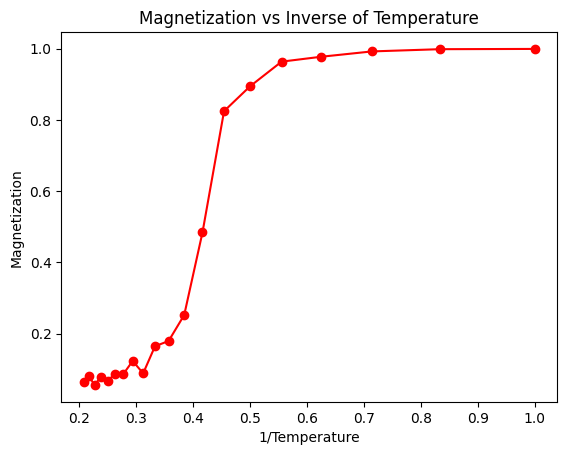

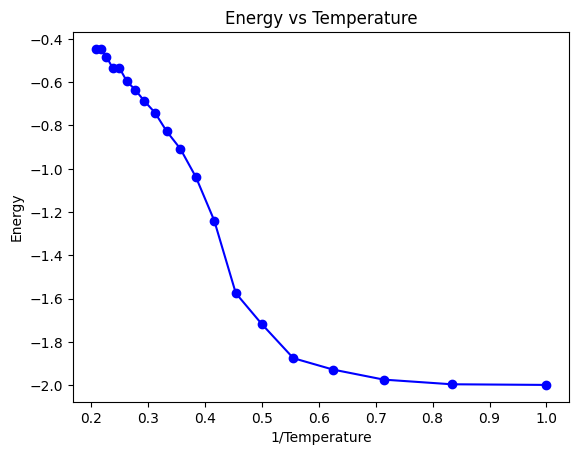

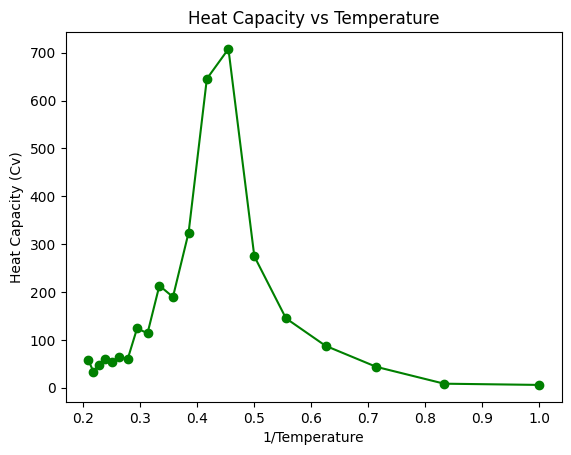

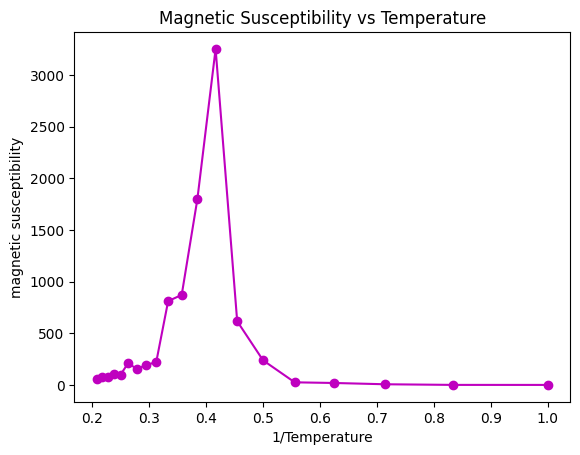

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

N=20
#T=5.0
J=1.0
Rep=200
Ts=np.arange(1,5,0.2)

def rnd_mx(N):
    mx=np.random.randint(0,N,size=(N,N))
    return mx

M=np.random.choice([-1,1],size=(N,N))

def energy(M):
    H=0
    for i in range(N):
        for j in range(N):
            H+=-0.5*J*M[i][j]*(M[(i+1)%N][j]+M[i][(j+1)%N]+M[i-1][j]+M[i][j-1])
    return H

def magnetization(M):
    mag=np.sum(M)
    mag=np.abs(mag)
    return mag

def Cv(T,N,std):
    cv=(T**(-2))*N*(std**2)
    return cv

def mag_sus(T,N,std):
    mag_sus=(T**(-1))*N*(std**2)
    return mag_sus

magnetizations=np.array([])
energies=np.array([])
magnetic_susceptibility=np.array([])
heat_capacities=np.array([])
for T in Ts:
    Mags=np.array([])
    Es=np.array([])
    for I in range(20):
        for k in range(Rep):
            A=rnd_mx(N)
            B=rnd_mx(N)
            #print(M,"\n")
            for i in range(N):
                for j in range(N):
                    a=A[i][j]
                    b=B[i][j]
                    #print(a,b)
                    s=M[a][b]
                    dE=2*J*s*(M[(a+1)%N][b] + M[(a-1)%N][b] + M[a][(b+1)%N] + M[a][(b-1)%N])
                    if dE<0:
                        s*=-1 
                    elif np.random.rand()<=np.exp(-dE/T):
                        s*=-1
                    M[a][b]=s
                    #print(M)
        #print("\n"f'Ising Model for {Rep} Repeats and N={N} and T=1,3,5')
        #print("\n",M,"\n")
        h=energy(M)
        Es=np.append(Es,h)
        mag=magnetization(M)
        Mags=np.append(Mags,mag)

    #Es/=(N**2)
    #Mags/=(N**2)
    av_E=np.average(Es)
    energies=np.append(energies,av_E)
    av_mag=np.average(Mags)
    magnetizations=np.append(magnetizations,av_mag)
    energies_std=np.std(energies)
    magnetizations_std=np.std(magnetizations)
    #cv=Cv(T,N,energies_std)
    cv=(np.var(Es))/(T**2)
    heat_capacities=np.append(heat_capacities,cv)
    #m_s=mag_sus(T,N,magnetizations_std)
    m_s=(np.var(Mags))/T
    magnetic_susceptibility=np.append(magnetic_susceptibility,m_s)

Ts_inv=np.reciprocal(Ts)
plt.plot(Ts_inv,(magnetizations/(N**2)),'o-',color='r')
plt.xlabel('1/Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Inverse of Temperature')
plt.show()
plt.plot(Ts_inv,(energies/(N**2)),'o-',color='b')
plt.xlabel('1/Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
plt.show()
plt.plot(Ts_inv,heat_capacities,'o-',color='g')
plt.xlabel('1/Temperature')
plt.ylabel('Heat Capacity (Cv)')
plt.title('Heat Capacity vs Temperature')
plt.show()
plt.plot(Ts_inv,magnetic_susceptibility,'o-',color='m')
plt.xlabel('1/Temperature')
plt.ylabel('magnetic susceptibility')
plt.title('Magnetic Susceptibility vs Temperature')
plt.show()